# 🧠 Tarea Semana 2: Optimización de hiperparámetros de Redes Neuronales

Este notebook está diseñado para resolver un problema supervisado (regresión) utilizando un modelo de red neuronal `MLPRegressor`, y aplicar optimización de hiperparámetros (grid search) con validación cruzada (10 folds).


## 📝 Instrucciones 

1. **Carga del conjunto de datos**
   Utiliza el conjunto de datos **Breast Cancer Wisconsin** disponible en el siguiente enlace:
   [https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast\_cancer.csv](https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast_cancer.csv)

2. **Preprocesamiento básico**

   * Verifica los tipos de datos.
   * Estándariza las variables numéricas si es necesario.
   * Divide el conjunto en entrenamiento y prueba (por ejemplo, 80%/20%).

3. **Diseña un modelo de red neuronal (MLPClassifier)** y **Optimiza los hiperparámetros**

   * Utiliza `scikit-learn` y usa `GridSearchCV` con validación cruzada de **10 folds** para encontrar la mejor combinación de hiperparámetros (`activation`, `hidden_layer_sizes`, etc.).

4. **Entrenamiento y evaluación del modelo**

   * Entrena el modelo óptimo con el conjunto de hiperparámetros del mejor modelo.
   * Evalúalo para los 10 folds.

5. **Métricas de desempeño en un conjunto de prueba**

   * Calcula y visualiza la **matriz de confusión**.
   * Reporta las métricas: **precisión (accuracy)**, **recall**, **F1-score**.
   * Utiliza `classification_report` y `confusion_matrix` de `sklearn`.

6. **Análisis de resultados**

   * Comenta brevemente los resultados obtenidos.
   * ¿Qué observas sobre el desempeño del modelo? ¿Qué métricas destacan?


### ⏰ Tiempo estimado para completar la actividad: 2 horas

## 🧠 **Opción 1: Low Code — Clasificación con MLPClassifier y Optimización de hiperparámetros**

En esta tarea trabajarás con un conjunto de datos de cáncer de mama y aplicarás una red neuronal multicapa (**MLPClassifier**) usando un **pipeline**, con búsqueda de los mejores hiperparámetros mediante validación cruzada.

Solo necesitarás modificar algunas partes específicas del código indicadas con `# 👈 CAMBIA AQUÍ`.

### 📌 1. Cargar los datos y explorar la variable objetivo

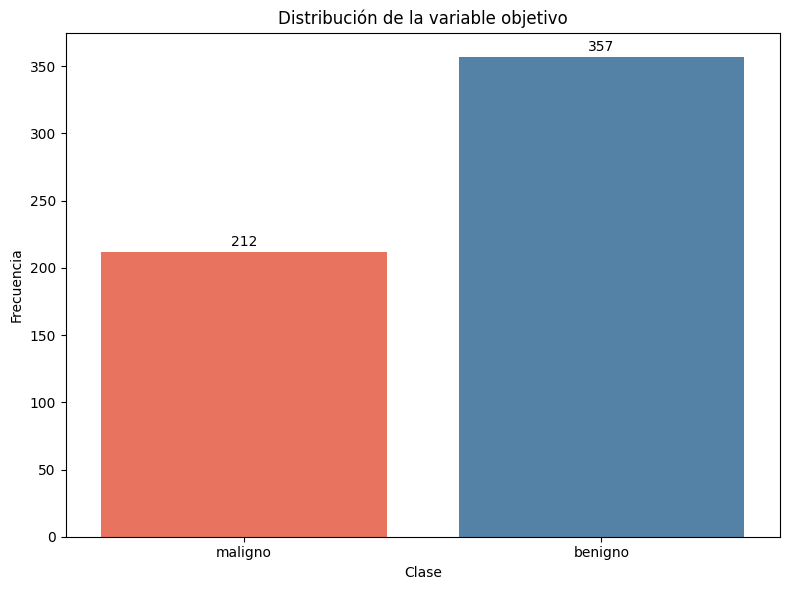

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde GitHub
df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast_cancer.csv")

# Visualizar la variable objetivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x="target",   # 👈 CAMBIA AQUÍ si tu variable objetivo tiene otro nombre
    hue="target",
    palette={'maligno': 'tomato', 'benigno': 'steelblue'}
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()

### 🧪 2. Separar conjunto de entrenamiento y prueba

In [2]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df.drop(columns='target')  # 👈 CAMBIA AQUÍ si tu variable objetivo tiene otro nombre
y = df['target']

# Partición del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

### ⚙️ 3. Pipeline y optimización con validación cruzada

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Crear pipeline: escalador + red neuronal
pipe = make_pipeline(
    StandardScaler(),
    MLPClassifier(max_iter=1000, random_state=42)
)

# Definir hiperparámetros a probar
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (200,)],  # 👈 CAMBIA AQUÍ las neuronas en la capa oculta, 50,100,200
    'mlpclassifier__activation': ['relu', 'tanh', 'logistic'],  # 👈 CAMBIA AQUÍ la activation function, puedes probar 'relu', 'tanh'
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01]  # 👈 Regularización L2
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Buscar los mejores parámetros
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)  # 👈 CAMBIA AQUÍ X_train, y_train

# Mostrar el mejor modelo
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)

Mejores hiperparámetros encontrados:
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (200,)}


1. **Validación cruzada de 10 folds** usando `cross_val_score` sobre el **mejor modelo encontrado**.
2. **Visualización con boxplot** de las métricas.
3. **Tabla de métricas promedio y desviación estándar**.

### 📊 4. Evaluación con validación cruzada y visualización de métricas


Resumen de métricas con validación cruzada (10 folds):
                     mean       std
accuracy         0.982308  0.017182
precision_macro  0.985479  0.013820
recall_macro     0.977286  0.023456
f1_macro         0.980652  0.019075


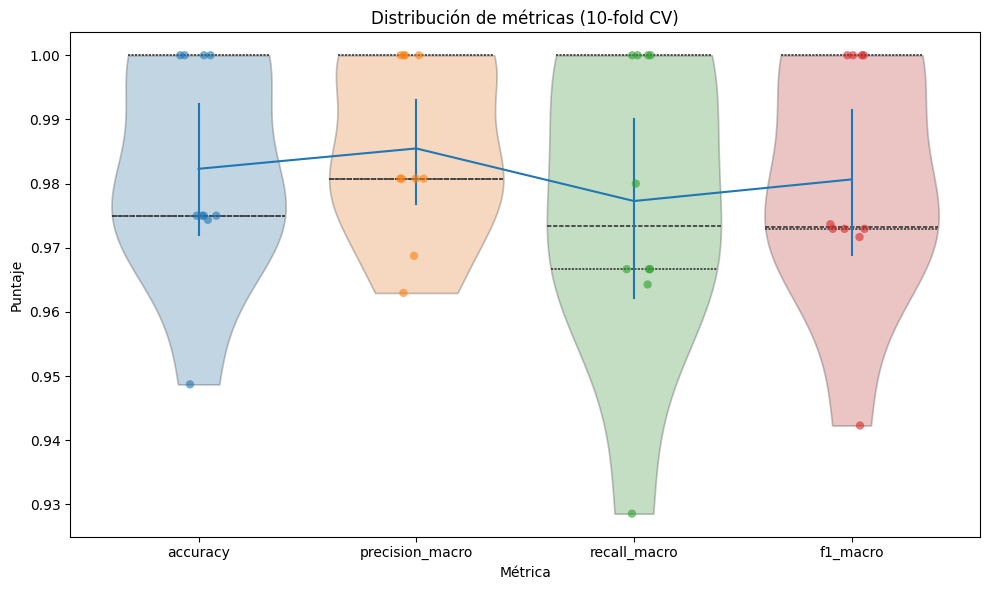

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extraer el mejor modelo del GridSearchCV
best_model = grid.best_estimator_

# Validación cruzada con 10 folds para distintas métricas
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_scores = {}

for metric in scoring:
    scores = cross_val_score(best_model, X_train, y_train,  # 👈 CAMBIA AQUÍ X_train, y_train
                             cv=10, scoring=metric, n_jobs=-1)
    cv_scores[metric] = scores

# Convertir a DataFrame
cv_df = pd.DataFrame(cv_scores)

# Mostrar resumen
summary = cv_df.agg(['mean', 'std']).T
print("\nResumen de métricas con validación cruzada (10 folds):")
print(summary)

# Convertir a formato largo para graficar
df_long = cv_df.melt(var_name="Métrica", value_name="Puntaje")

# Crear la figura
plt.figure(figsize=(10, 6))

# Boxplot + stripplot + línea de la media
sns.violinplot(data=df_long, x="Métrica", y="Puntaje", hue="Métrica", alpha=.3, cut=0, inner='quartil')
sns.stripplot(data=df_long, x="Métrica", y="Puntaje", hue="Métrica", size=6, alpha=0.6)
# Agregar líneas de medias y barras de error
sns.lineplot(data=df_long, x="Métrica", y="Puntaje", err_style='bars')

# Etiquetas y estilo
plt.title("Distribución de métricas (10-fold CV)")
plt.ylabel("Puntaje")
plt.xlabel("Métrica")
#plt.ylim(0.6, 1.05)
#plt.grid(True)
plt.tight_layout()

### 🧪 5. Evaluación final en conjunto de prueba


Reporte de clasificación (conjunto de prueba):

              precision    recall  f1-score   support

     benigno       0.96      1.00      0.98       107
     maligno       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



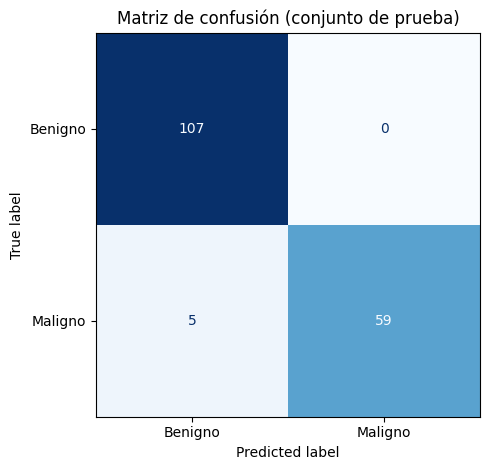

In [5]:
# Predecir sobre el conjunto de prueba
y_pred = best_model.predict(X_test)

# Reporte de clasificación
print("\nReporte de clasificación (conjunto de prueba):\n")
print(classification_report(y_test, y_pred))  # 👈 CAMBIA AQUÍ y_test, y_pred

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['Benigno', 'Maligno'],
    cmap='Blues',
    colorbar=False
)
plt.title("Matriz de confusión (conjunto de prueba)")
plt.grid(False)
plt.tight_layout()

### ✅ Recomendaciones finales

* Comenta cada bloque que modifiques.
* Puedes probar con diferentes:

  * Variables predictoras
  * Porcentajes de partición
  * Configuraciones de capas ocultas
  * Funciones de activación

### 💬 Reflexión

Comenta brevemente los resultados obtenidos:

* ¿El modelo clasificó correctamente la mayoría de los casos?
* ¿Qué métricas destacan?
* ¿Qué podrías mejorar en una siguiente iteración?